# **Image transformations (with Pillow)**

<div style="color:#777777;margin-top: -15px;">
<b>Author</b>: Norman Juchler |
<b>Course</b>: ADLS ISP |
<b>Version</b>: v1.1 <br><br>
<!-- Date: 03.04.2025 -->
<!-- Comments: NOT refactored. -->
</div>

It is a common task to move, rotate, scale or otherwise transform an image. In this tutorial, you will learn about different ways to do this in Python.

**Input**: 2D image  
**Output**: Transformed 2D image  
**Methods**: translate, rotate, scale, warp, crop  
**Tools**: Pillow  
**Goal**: Understand how to move an image  


---

## **Preparations**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import PIL

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import isp


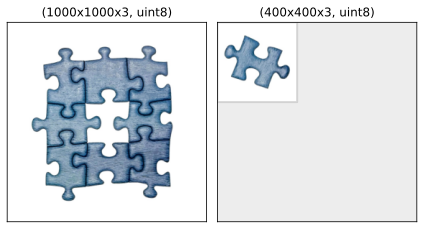

In [2]:
# Read in the images
imageA = PIL.Image.open("../data/images/water2/missing.jpg")
imageB = PIL.Image.open("../data/images/water2/piece-rotated.jpg")
isp.show_image_pair(imageA, imageB)

---

## **Basic transformations**

Pillow is really straightforward to use.

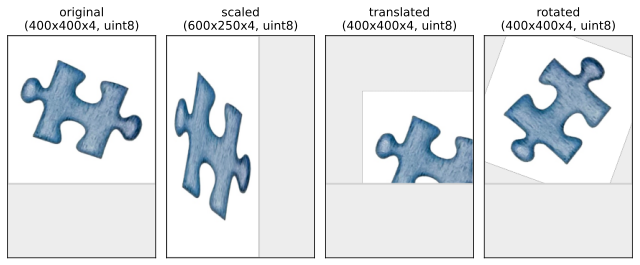

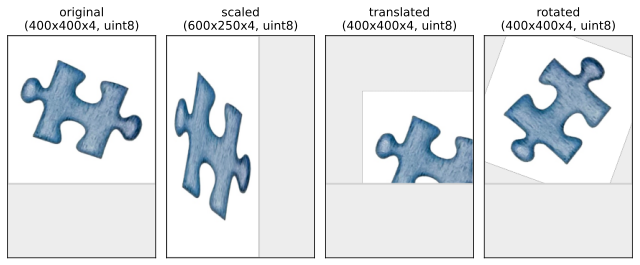

In [3]:
# Define a background color
#background = (143, 166, 193	)   # RGB values
background = (0, 0, 0, 0)       # Transparent color

# Convert the image to RGBA
imageB = imageB.convert("RGBA")

# Resize
scaled = imageB.resize((250, 600))

# Translate
translated = PIL.Image.new(imageB.mode, imageB.size, color=background)
translated.paste(imageB, (100, 150))

# Rotate
rotated = imageB.rotate(70, fillcolor=background)

isp.show_image_chain(images=(imageB, scaled, translated, rotated),
                     titles=("original", "scaled", "translated", "rotated"))

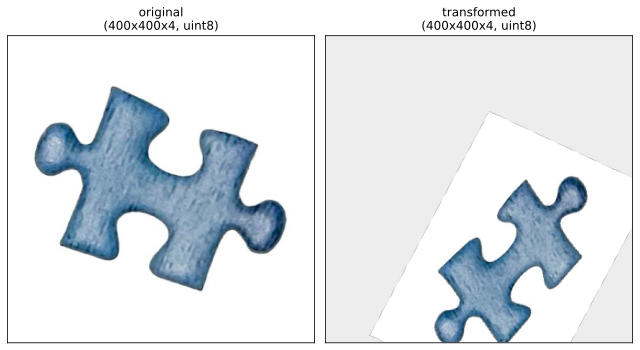

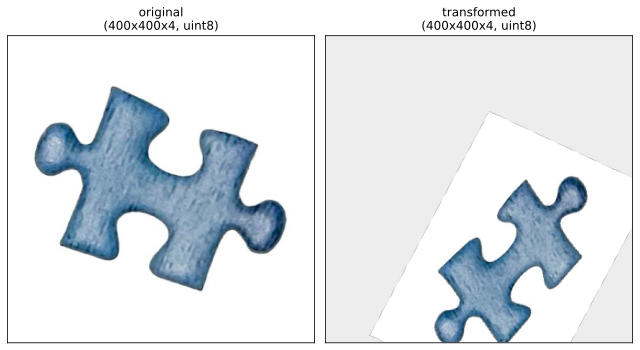

In [5]:
# It is also possible to specify an affine transformation matrix
# to perform arbitrary transformations
mask = np.array([[0.51, -1.1, 400], [1.5, 0.8, -400], [0, 0, 1]])
transformed = imageB.transform(imageB.size, PIL.Image.AFFINE, mask.flatten(), 
                               fillcolor=background)
isp.show_image_chain(images=[imageB, transformed], dpi=150,
                     titles=["original", "transformed"], )